In [328]:
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import classification_report

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [329]:
df_train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [330]:
df_test.tail()

,message,tweetid
10541,"RT @BrittanyBohrer: Brb, writing a poem about ...",895714
10542,2016: the year climate change came home: Durin...,875167
10543,RT @loop_vanuatu: Pacific countries positive a...,78329
10544,"RT @xanria_00018: You’re so hot, you must be t...",867455
10545,RT @chloebalaoing: climate change is a global ...,470892


In [331]:
df_train['sentiment'].value_counts()

 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64

*** Combine Dataset ***

In [332]:
split_var = df_train.shape[0]
df_test['sentiment'] = [np.nan]* df_test.shape[0]
df = pd.concat([df_train, df_test], axis=0, ignore_index=True)

In [333]:
df_test.shape, df_train.shape, df.shape

((10546, 3), (15819, 3), (26365, 3))

** Train Preprocessing and Predicition **

In [334]:
blanks = []  # start with an empty list

for i,sen,mess,tweet in df.itertuples():  # iterate over the DataFrame
    if type(mess)==str:            # avoid NaN values
        if mess.isspace():         # test 'review' for whitespace
            blanks.append(i)     # add matching index numbers to the list

df.drop(blanks, inplace=True)

In [335]:
df['sentiment'].value_counts()

 1.0    8530
 2.0    3640
 0.0    2353
-1.0    1296
Name: sentiment, dtype: int64

In [336]:
df.head()

,sentiment,message,tweetid
0,1.0,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1.0,It's not like we lack evidence of anthropogeni...,126103
2,2.0,RT @RawStory: Researchers say we have three ye...,698562
3,1.0,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1.0,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [337]:
# Remove urls
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'
df['message'] = df['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)

In [338]:
# Remove rt
pattern_url = r'rt '
subs_url = r' '
df['message'] = df['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)

In [339]:
# Remove hash
pattern_url = r'#'
subs_url = r' '
df['message'] = df['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)

In [340]:
# Remove hash
pattern_url = r'"'
subs_url = r' '
df['message'] = df['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)

In [341]:
# Remove funny characters
pattern_url = r'Ã£Â¢Ã¢â€šÂ¬Ã¢Â¦'
subs_url = r' '
df['message'] = df['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)

In [342]:
# Make lower case
df['message'] = df['message'].str.lower()
df.head()

,sentiment,message,tweetid
0,1.0,polyscimajor epa chief doesn't think carbon di...,625221
1,1.0,it's not like we lack evidence of anthropogeni...,126103
2,2.0,rt @rawstory: researchers say we have three ye...,698562
3,1.0,todayinmaker wired : 2016 was a pivotal year...,573736
4,1.0,"rt @soynoviodetodas: it's 2016, and a racist, ...",466954


In [343]:
# Strip out punctuation marks and numerals
import string
def remove_punctuation_numbers(post):
    punc_numbers = string.punctuation + '0123456789'
    return ''.join([l for l in post if l not in punc_numbers])

df['message'] = df['message'].apply(remove_punctuation_numbers)

In [344]:
df.head(100)

,sentiment,message,tweetid
0,1.0,polyscimajor epa chief doesnt think carbon dio...,625221
1,1.0,its not like we lack evidence of anthropogenic...,126103
2,2.0,rt rawstory researchers say we have three year...,698562
3,1.0,todayinmaker wired was a pivotal year in t...,573736
4,1.0,rt soynoviodetodas its and a racist sexist cl...,466954
...,...,...,...
95,1.0,rt ronaldklain as trump decides on paris brian...,458845
96,1.0,rt savingoceans lack of climate change action...,695439
97,1.0,“yet another trump advisor is clueless on clim...,894382
98,1.0,rt stephenschlegel shes thinking about how she...,603318


In [345]:
sum_train = df[['sentiment', 'message']].groupby('sentiment').count()

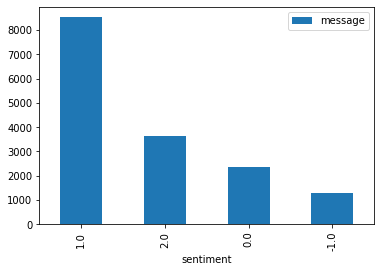

In [346]:
# Plot posts by personality types
sum_train.sort_values('message', ascending=False).plot(kind='bar')
plt.show()

*** Split Df ***

In [347]:
y = df[:split_var]['sentiment']
trainds = df[:split_var]
testds = df[split_var:]

In [348]:
y.shape, trainds.shape, testds.shape

((15819,), (15819, 3), (10546, 3))

In [349]:
#from sklearn.utils import resample
#believe = trainds[trainds['sentiment'] == 1]
#no_belief = trainds[trainds['sentiment'] == -1]
#neutral = trainds[trainds['sentiment'] == 0]
#news = trainds[trainds['sentiment'] == 2]

#no_belief_resampled = resample(no_belief,
#                                  replace=True, # sample with replacement (we need to duplicate observations)
#                                  n_samples=len(believe), # number of desired samples
#                                  random_state=27) # reproducible results

#neutral_resampled = resample(neutral,
#                                  replace=True, # sample with replacement (we need to duplicate observations)
#                                  n_samples=len(believe), # number of desired samples
#                                  random_state=27) # reproducible results

#news_resampled = resample(news,
#                                  replace=True, # sample with replacement (we need to duplicate observations)
#                                  n_samples=len(believe), # number of desired samples
#                                  random_state=27) # reproducible results

#trainds = pd.concat([believe, no_belief_resampled, neutral_resampled, news_resampled ], ignore_index=True, sort=False)

** X and Y split **

In [350]:
X = trainds['message'] 

In [351]:
y = trainds['sentiment'].to_numpy()

In [352]:
trainds.shape

(15819, 3)

In [353]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

X_train_tfidf = vectorizer.fit_transform(X) # remember to use the original X_train set

In [354]:
X_train_tfidf.shape

(15819, 24167)

In [355]:
def get_feature_vector(train_fit):
    vector = TfidfVectorizer(sublinear_tf=True, min_df=2,max_df=0.9,ngram_range=(1,2))
    vector.fit(train_fit)
    return vector


In [356]:
tf_vector = get_feature_vector(np.array(trainds['message'].iloc[:]).ravel())
X = tf_vector.transform(np.array(trainds['message'].iloc[:]).ravel())

test_data = tf_vector.transform(np.array(testds['message'].iloc[:]).ravel())


In [357]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV 

In [358]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=0)

In [359]:
#logreg = LogisticRegression()
#logreg = RandomForestClassifier(n_estimators=120, random_state=52)
#logreg = DecisionTreeClassifier(random_state=22)
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
logreg = LinearSVC(C=0.7) 
logreg.fit(X_train,y_train)

LinearSVC(C=0.7)

In [360]:
# Generate predictions
y_pred = logreg.predict(X_test)

In [361]:
X_test.shape

(1582, 32688)

In [362]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        -1.0       0.79      0.52      0.62       130
         0.0       0.71      0.46      0.56       235
         1.0       0.79      0.91      0.84       853
         2.0       0.80      0.80      0.80       364

    accuracy                           0.78      1582
   macro avg       0.77      0.67      0.71      1582
weighted avg       0.78      0.78      0.77      1582



*** Test Prediction and Submission ***

In [363]:
y_pred.shape,test_data.shape,testds.shape

((1582,), (10546, 32688), (10546, 3))

In [364]:
# Generate predictions
y_pred = logreg.predict(test_data).astype(int)

In [365]:
y_pred.shape

(10546,)

In [366]:
submission = pd.DataFrame(data = {'tweetid': df_test['tweetid'], 'sentiment': y_pred})
submission.to_csv("submission_19102020_v10.csv", index=False)